In [7]:
# La altura de una población se distribuye como una normal de media 170 y desviación típica 5. Se pide:
# a) Obtener las siguientes muestras de la población y representar las distribuciones obtenidas gráficamente:
#    - 10 valores
#    - 100 valores
#    - 10000 valores
# b) Obtener el valor teórico de la distribución normal
# c) Calcular la probabilidad de que una persona mida menos de 160 cm o más de 195 cm

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
from plotnine import *
import pandas as pd
from pandas.core.common import flatten

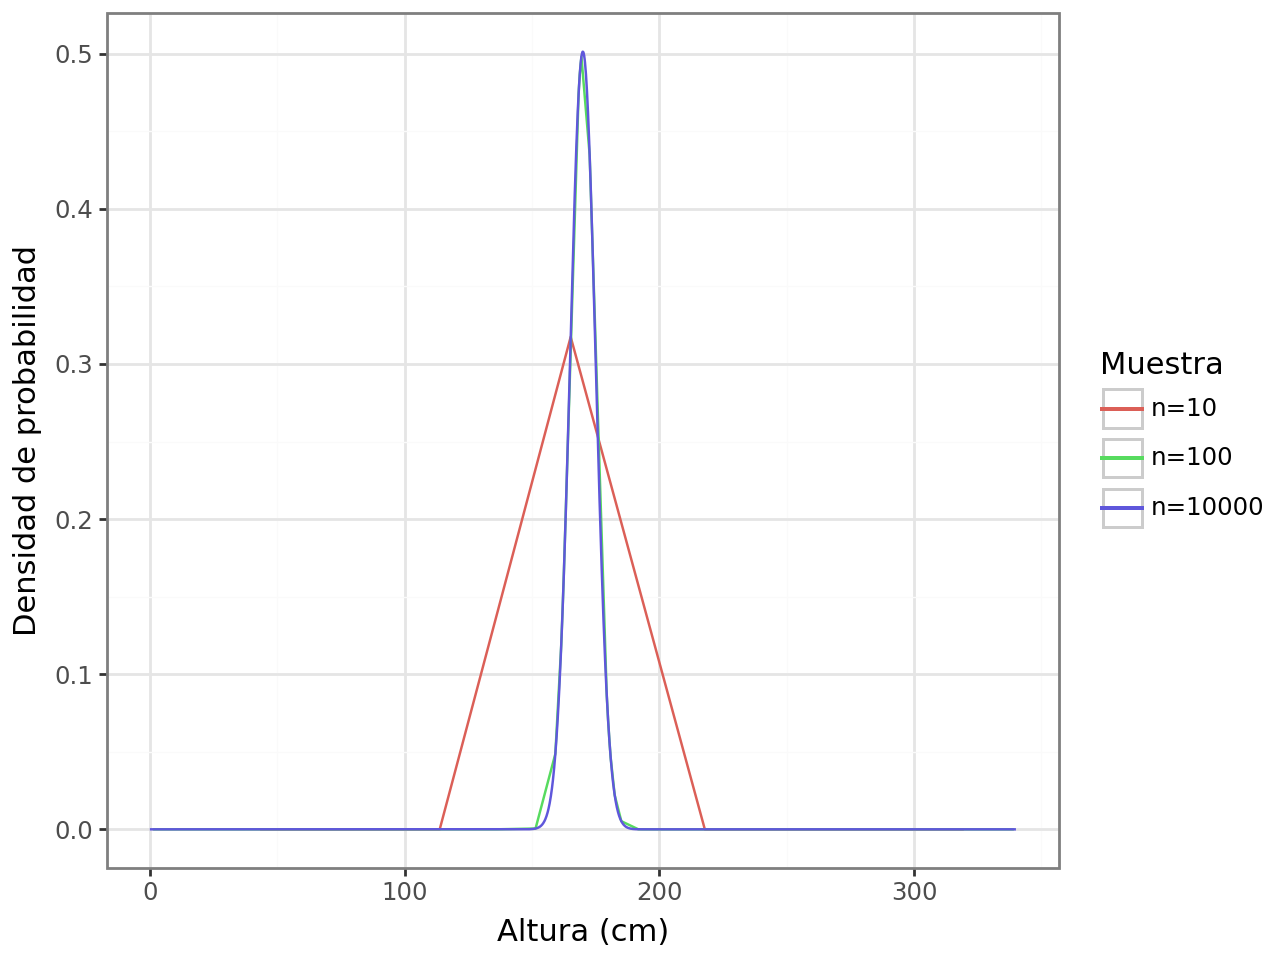

In [10]:
# Apartado a)
# Mi respuesta

x = np.array([i/100 for i in range(34000)])
f = lambda x: (1/5*np.sqrt(2*np.pi))*np.exp(-0.5*((x-170)/5)**2) # Distribución normal
y = f(x)

np.random.seed(seed=3)

# 10 valores
x1 = random.sample(list(x),10)
x1 = np.array(x1)
y1 = f(x1)

# 100 valores
x2 = random.sample(list(x),100)
x2 = np.array(x2)
y2 = f(x2)

# 10000 valores
x3 = random.sample(list(x),10000)
x3 = np.array(x3)
y3 = f(x3)

# Se crea un dataframe con los datos anteriores pues la función ggplot de plotnine toma uno por argumento. La columna1 serán los datos 'x' extraídos 
# de la distribución normal, la columnda 2 serán los datos 'y' y la última columna a qué conjunto pertenecen; n=10, n=100 o n=10000.
columna1 = list(x1) + list(x2) + list(x3)
columna2 = list(y1) + list(y2) + list(y3)
columna3 = [['n=10']*10, ['n=100']*100, ['n=10000']*10000]
columna3 = list(flatten(columna3)) # Se precisa haber importado el módulo pandas.core.common
dic = {'Altura':columna1, 'Densidad de probabilidad':columna2, 'Muestra':columna3}
df = pd.DataFrame(dic)

(
    ggplot(data=df) + aes(x='Altura', y='Densidad de probabilidad', color='Muestra', fill='Muestra') + geom_line() +
    theme_bw() + ylab('Densidad de probabilidad') + xlab('Altura (cm)')
)

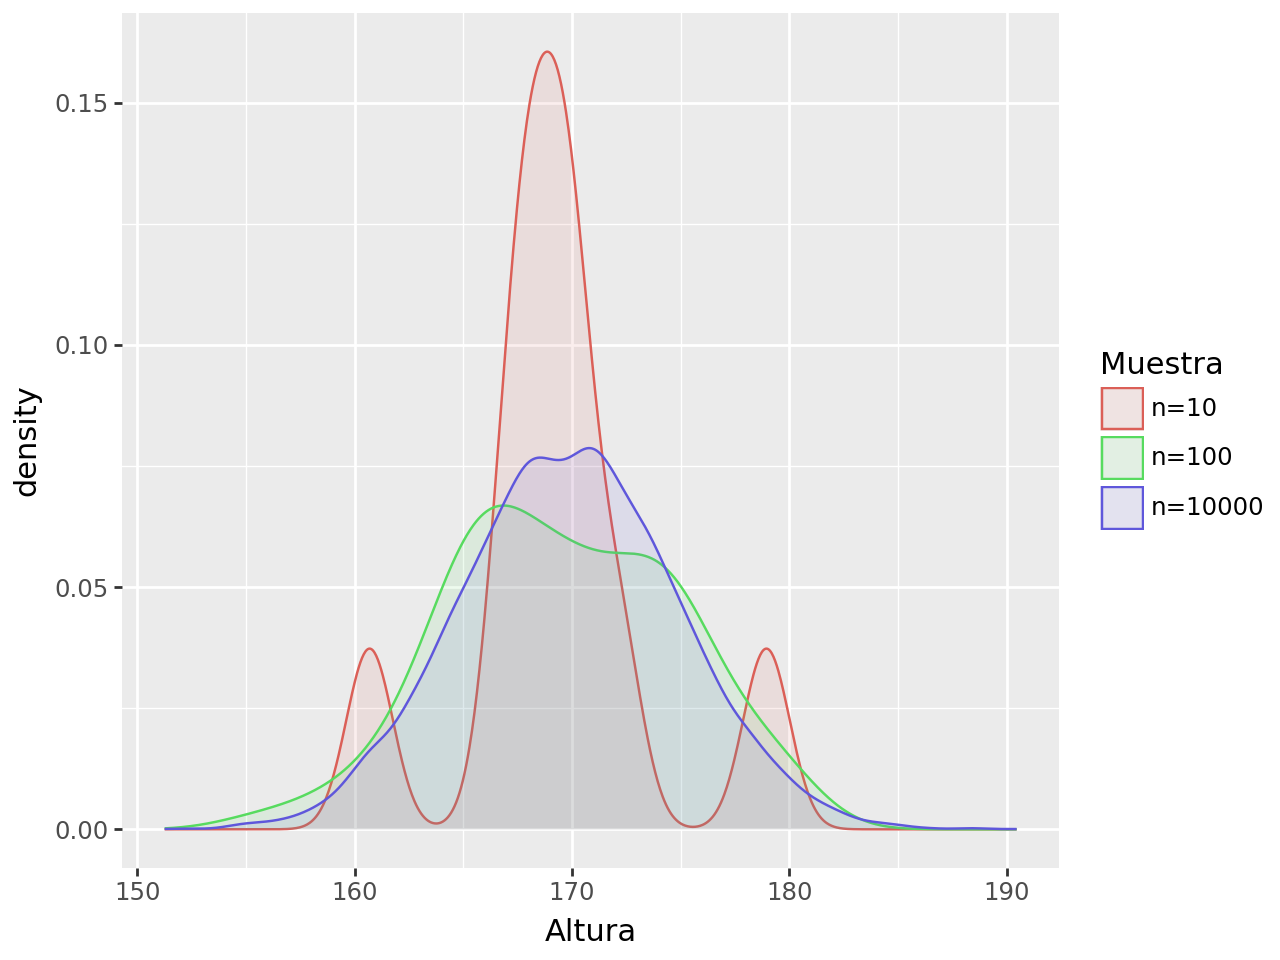

In [13]:
# Apartado a)
# Respuesta del profesor

np.random.seed(seed=3)
normal_a1 = np.random.normal(170,5,10)
normal_a2 = np.random.normal(170,5,100)
normal_a3 = np.random.normal(170,5,10000)
normal_a1 = list(normal_a1)
normal_a2 = list(normal_a2)
normal_a3 = list(normal_a3)

# Se crea dataframe
columna1 = normal_a1 + normal_a2 + normal_a3
columna2 = [['n=10']*10, ['n=100']*100, ['n=10000']*10000]
columna2 = list(flatten(columna2))
dic = {'Altura':columna1, 'Muestra':columna2}
df = pd.DataFrame(dic)

(ggplot(df, aes(x='Altura', color='Muestra', fill='Muestra')) + geom_density(alpha=0.1))

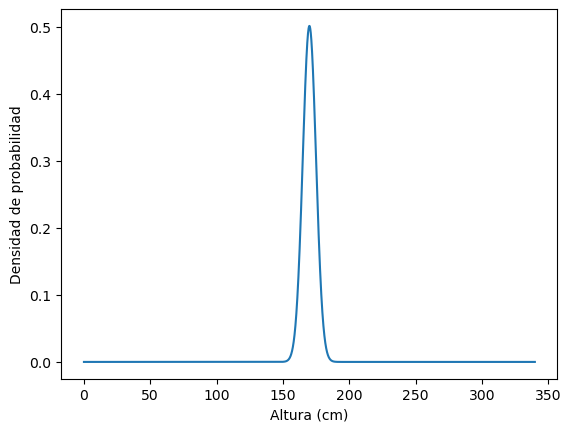

In [158]:
# Apartado b)
# Mi respuesta

plt.plot(x,y)
plt.xlabel('Altura (cm)')
plt.ylabel('Densidad de probabilidad')
plt.show()

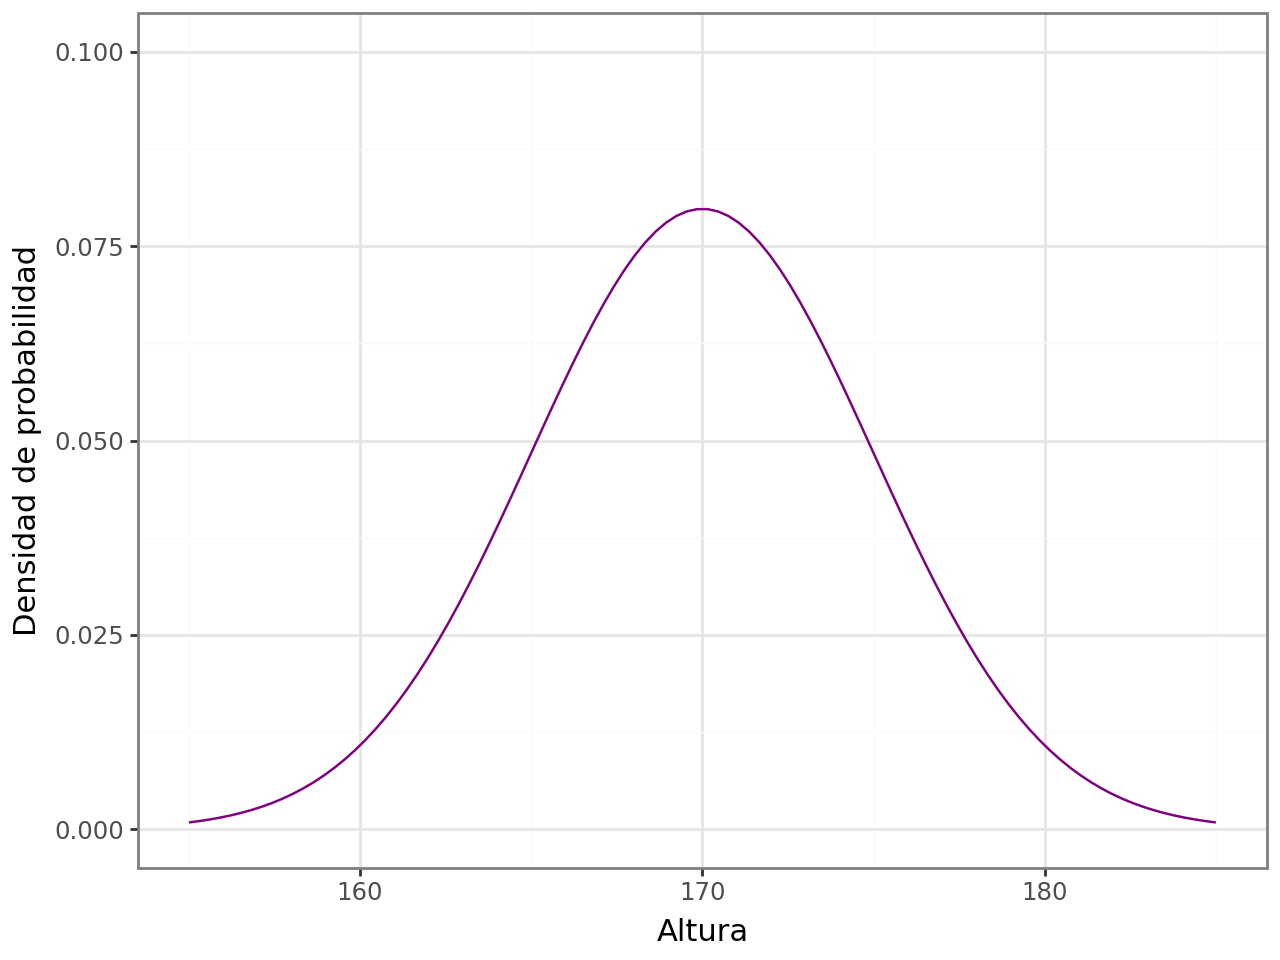

In [178]:
# Apartado b)
# Respuesta del profesor

import scipy.stats as stats

mu = 170
sigma = 5
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = stats.norm.pdf(x, mu, sigma) # Calcula la función densidad de probabilidad normal

ggplot(aes(x=x, y=y)) + geom_line(color='purple') + ylim(0, 0.10) + ylab('Densidad de probabilidad') + xlab('Altura') + theme_bw()

In [182]:
# Apartado c)
# Respuesta del profesor

# Probabilidad de medir menos de 160 cm
p1 = stats.norm.cdf(160, mu, sigma)

# Probabilidad de medir más de 195 cm
p2 = 1 - stats.norm.cdf(195, mu, sigma)

# Probabilidad de medir menos de 160 cm o más de 195 cm
p1 + p2

0.022750418599751118

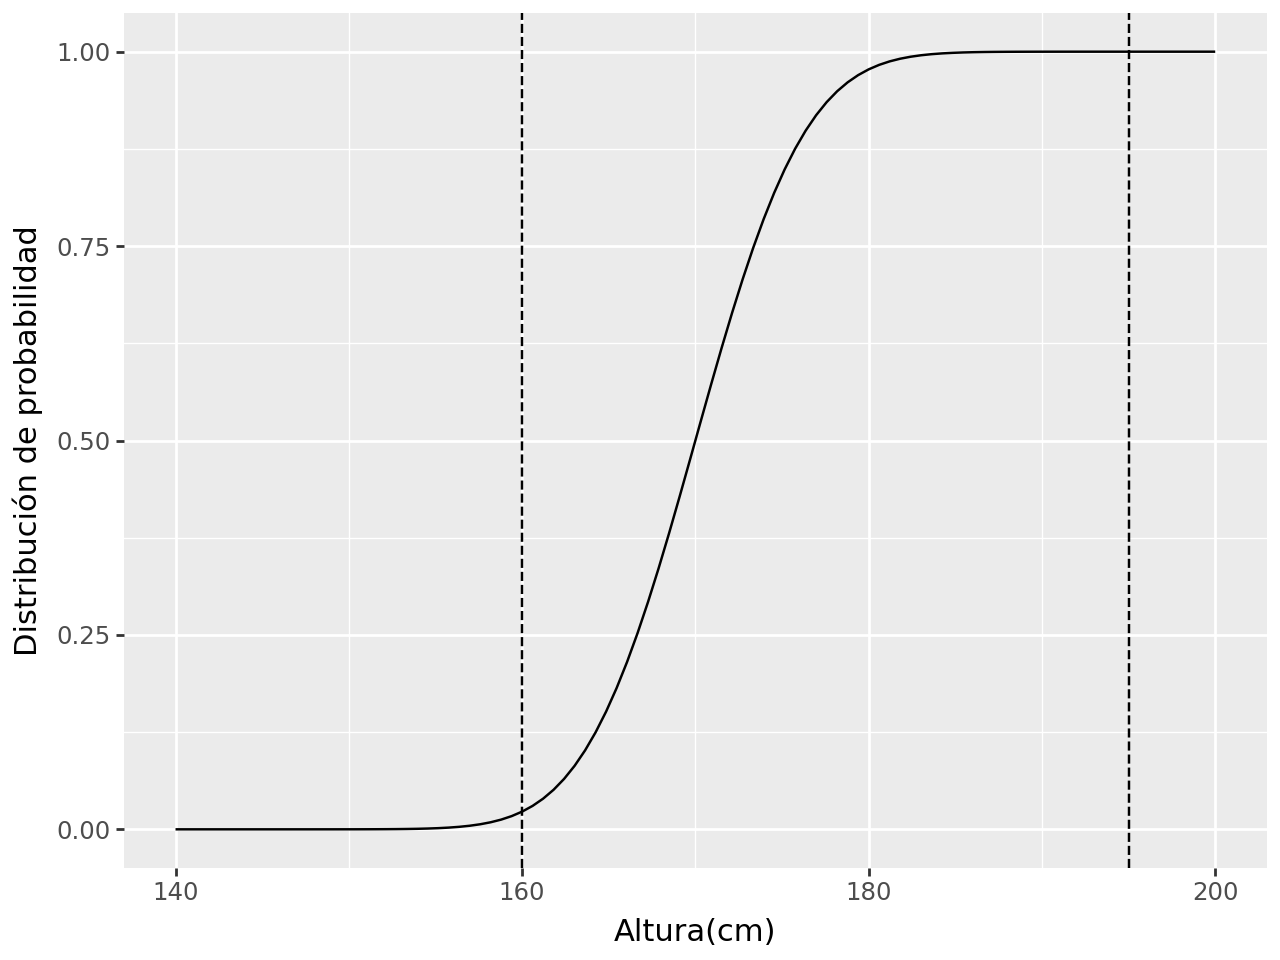

In [186]:
# Podemos representar la distribución de probabilidad (probabilidad acumulada) usando la función stats.norm.cdf, que realiza la integración
# de la densidad de probabilidad

x = np.linspace(mu - 6*sigma, mu + 6*sigma, 100)
y = stats.norm.cdf(x, mu, sigma)

ggplot(aes(x=x, y=y)) + geom_line() + geom_vline(xintercept=[160,195], linetype='dashed') + xlab('Altura(cm)') + ylab('Distribución de probabilidad')